In [2]:
%matplotlib inline

import pickle
import pdb
import numpy as np

with open('dump.pkl', 'rb') as file:
    [vgtt, vslt, vx_b, vy_b, vrpreds, vcpreds, vlr_list, vlc_list, voa_list, 
     imgs, labels, preds, cp, 
     tx_, ty_, tw_, th_, px_, py_, pw_, ph_, gtt, slt, reg_loss_list, cls_loss_list, oal_loss_list, f, l] = pickle.load(file)

0.9283447265625


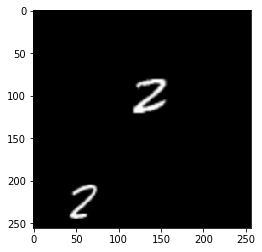

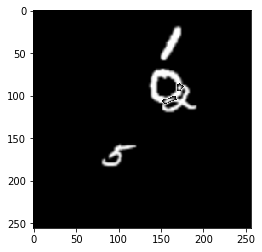

In [13]:
#print(np.mean(vx_b == imgs))

#import matplotlib.pyplot as plt
#plt.imshow(vx_b.reshape((256,256,3)))
#plt.show()
#plt.imshow(imgs[0,:,:,:])
#plt.show()

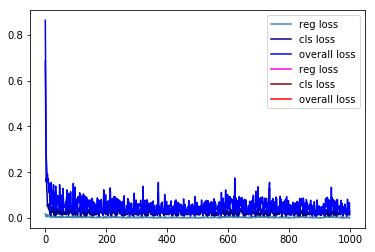

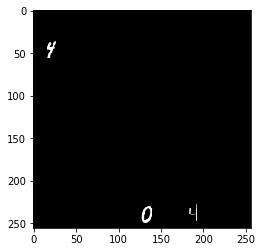

[[0, 240, 134, 28, 28, 0.0, 1.0], [4, 238, 189, 28, 28, 0.0, 1.0], [4, 45, 21, 28, 28, 0.0, 1.0], [-9, -9, -9, -9, -9, -9, -9], [-9, -9, -9, -9, -9, -9, -9], [-9, -9, -9, -9, -9, -9, -9], [-9, -9, -9, -9, -9, -9, -9], [-9, -9, -9, -9, -9, -9, -9], [-9, -9, -9, -9, -9, -9, -9], [-9, -9, -9, -9, -9, -9, -9]]
ground truth tensor 0 : -2.0
ground truth tensor 1 : -2.0
ground truth tensor 2 : -2.0
ground truth tensor 3 : -2.0
mean predictions:
x: 35.45656
y: 15.1793165
w: -0.22319072
h: 8.450321
predictions anchor 0
x: 252.57672
y: 123.25843
w: 30.9441
h: 51.941956
predictions anchor 1
x: 21.325752
y: -0.22021866
w: -5.6706696
h: -25.499546
predictions anchor 2
x: 1.2458568
y: 13.875636
w: -19.45087
h: 37.66198
predictions anchor 3
x: -19.349981
y: -22.550886
w: 3.2358048
h: 15.77994
predictions anchor 4
x: -14.8185425
y: 26.633331
w: -77.68919
h: -3.383977
predictions anchor 5
x: 28.954819
y: -18.793995
w: 43.207096
h: -12.996832
predictions anchor 6
x: 9.727363
y: 8.349047
w: 41.415577
h: 

In [12]:
# # plot cost development
import matplotlib.pyplot as plt
plt.figure()
plt.plot(reg_loss_list, label='reg loss', c='steelblue')
plt.plot(cls_loss_list, label='cls loss', c='darkblue')
plt.plot(oal_loss_list, label='overall loss', c='blue')
plt.plot(vlr_list, label='reg loss', c='magenta')
plt.plot(vlc_list, label='cls loss', c='darkred')
plt.plot(voa_list, label='overall loss', c='red')
plt.legend()
plt.show()

ROW = 14
COL = 11
CLOAK_DS = 1

img = imgs if CLOAK_DS == 0  else vx_b.reshape((1,256,256,3))
label = labels if CLOAK_DS == 0  else vy_b
pdics = preds if CLOAK_DS == 0 else vrpreds
sctio = slt if CLOAK_DS == 0 else vslt

#pdb.set_trace()

plt.imshow(img[0,:,:,:]); plt.show()
print(label)
for t in range(4):
    print('ground truth tensor',t,':', gtt[0, ROW, COL, t*9])
print('mean predictions:')
# shape: (1, 16, 16, 36)
#for i in range(9):
#print('0:')
print('x:',np.mean(pdics[0, ROW, COL,  [np.arange(0,9)]]))
#pdb.set_trace()
#print('x:',vpreds[0, ROW, 2,  0])
#print('x:',vpreds[0, ROW, 2,  9])
#print('x:',p10, 2,0, ROW, 2,  18])
#print('x:',vpreds[0, ROW, 2,  27])
print('y:',np.mean(pdics[0, ROW, COL,  [np.arange(0,9)+9]]))
print('w:',np.mean(pdics[0, ROW, COL, [np.arange(0,9)+18]]))
print('h:',np.mean(pdics[0, ROW, COL, [np.arange(0,9)+27]]))
#print('2:')
#print('x:',np.mean(vpreds[0, , ROW,  [np.arange(0,9)]]))
#print('y:',np.mean(vpreds[0, COL, ROW,  [np.arange(0,9)+9]]))
#print('w:',np.mean(vpreds[0, COL, ROW, [np.arange(0,9)+18]]))
#print('h:',np.mean(vpreds[0, COL, ROW, [np.arange(0,9)+27]]))
#print('x:',np.mean(vpreds[0, 5, 9,  [np.arange(0,9)]]))
#print('y:',np.mean(vpreds[0, 5, 9,  [np.arange(0,9)+9]]))
#print('w:',np.mean(vpreds[0, 5, 9, [np.arange(0,9)+18]]))
#print('h:',np.mean(vpreds[0, 5, 9, [np.arange(0,9)+27]]))
#print('x:',preds[0, 2, ROW,  0])
#print('y:',np.mean(vpreds[0, 2, ROW,  9]))
#print('w:',np.mean(vpreds[0, 2, ROW, 18]))
#print('h:',np.mean(vpreds[0, 2, ROW, 27]))

#print('ground truth tensor tensor:')
# gtt shape: (1, 16, 16, 36)
for t in range(9):
    print('predictions anchor',t)
    print('x:', pdics[0, ROW, COL, t+0])
    print('y:', pdics[0, ROW, COL, t+9])
    print('w:', pdics[0, ROW, COL,t+18])
    print('h:', pdics[0, ROW, COL,t+27])
    # results in a tensor with shape (1, IMG_SIZE, IMG_SIZE, 36)
for t in range(9):
    print('selection tensor',t,':', sctio[0, :, :, t, 1])

#print('y:', slt[i, 0, :, :, ])
#print('w:', slt[i, 0, :, :,18])
#print('h:', slt[i, 0, :, :,27])
# slt shape: (1, 16, 16, 9, 3)

